# Light GBM

* **XGBOOST'dan train hızını artırmak için üretilmiş.**
* **level-wise yerine leaf-wise süreci işlemektedir.**
* **XGBOOST karar ağacı yatay şekilde kullanırılken göre bir arama gerçekleştirirken Light GBM splitlere ağaçların kendilerine  odaklanmaktadır.**

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #destek vektor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   #grafik çizmek için
import matplotlib.pyplot as plt #grafik çizmek için
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

In [4]:
#veri
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Model & Tahmin

In [5]:
#!pip install lightgbm

In [7]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [9]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           c:\users\mutlu\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/a

In [10]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7486033519553073

### Model Tuning

In [11]:
lgbm_model = LGBMClassifier()

In [12]:
params = { "learning_rate": [0.01, 0.1, 0.002],
         "max_depth": [2, 7, 10],
         "n_estimators":[500, 2000]}

In [13]:
lgbm_cv=GridSearchCV(lgbm_model, params,cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.7s finished


In [14]:
lgbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

In [17]:
# final
lgbm_tuned = LGBMClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 500).fit(X_train, y_train)

In [22]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7337057728119181

### Değişken Önem sırası

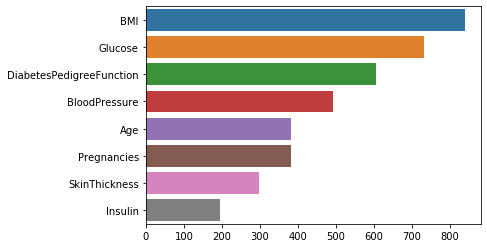

In [21]:
important = pd.Series(lgbm_tuned.feature_importances_, index = X_train.columns ).sort_values(ascending= False)
sns.barplot(x=important, y=important.index)